In [1]:
pip install MultiColumnLabelEncoder

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import MultiColumnLabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import pickle

In [4]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='oIr1aR0V6fcgOoFdU2bHCC8rDyddc0EVi2oqRU_vVHAP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'employeeperformance-donotdelete-pr-pp4lznhbejujmu'
object_key = 'garments_worker_productivity.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [5]:
data.head()

date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

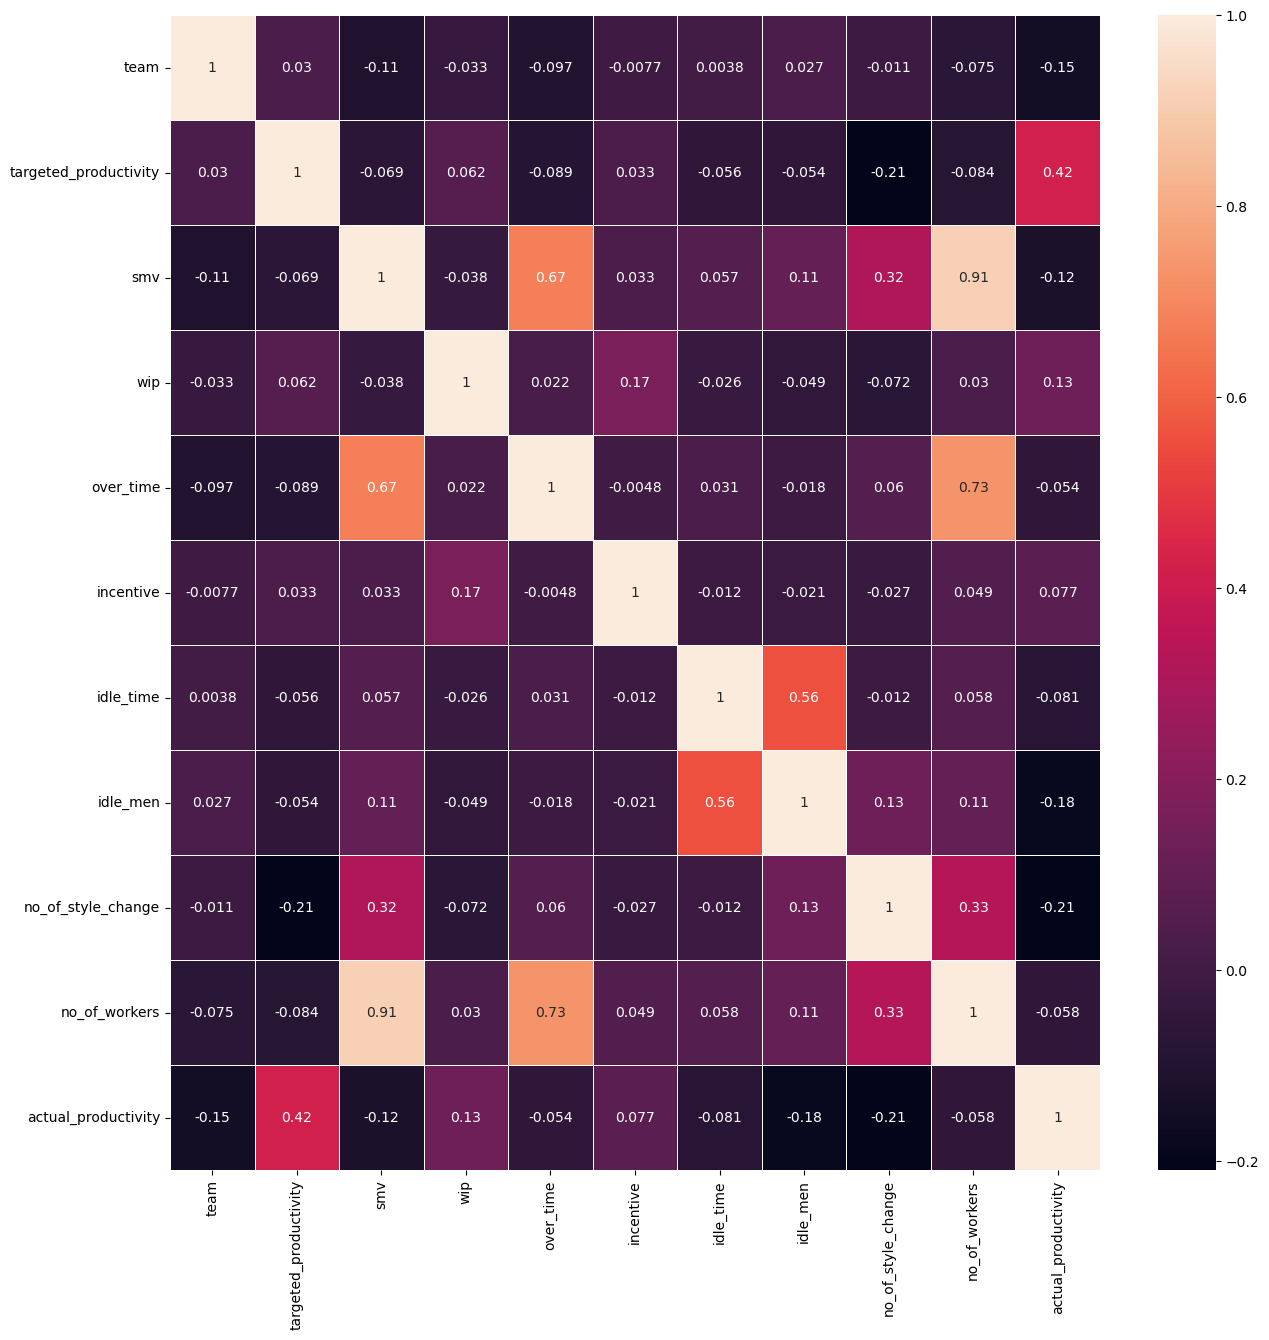

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [7]:
data.describe()

team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.000000     0.000000   
50%     3960.000000     0.000000     0.000000     0.000000   
75%     6960.000000    50.000000     0.000000     0.000000   
max    25920.000000  3600.000000   300.000000    45.000000   

       no_of_style_change  no_of_workers  actual_productivity  
count         1197.000000    1197.000000          1197.000000  
mean             0.150376      34.609858             0.735091  
std              0.427848      22.197687             0.174488  
min              0.000000       2.000000             0.233705  
25%              0.000000       9.000000             0.650307  
50%              0.000000      34.000000             0.773333  
75%              0.000000      57.000000             0.850253  
max              2.000000      89.000000             1.120437

In [8]:
data.shape
(1197,15)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [9]:
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [10]:
data.drop(['wip'],axis=1,inplace=True)

In [11]:
data["date"] = pd.to_datetime(data["date"])

In [12]:
data.date

0      2015-01-01
1      2015-01-01
2      2015-01-01
3      2015-01-01
4      2015-01-01
          ...    
1192   2015-03-11
1193   2015-03-11
1194   2015-03-11
1195   2015-03-11
1196   2015-03-11
Name: date, Length: 1197, dtype: datetime64[ns]

In [13]:
data['month']=data['date'].dt.month
data.drop(['date'],axis=1, inplace=True)

In [14]:
data.month

0       1
1       1
2       1
3       1
4       1
       ..
1192    3
1193    3
1194    3
1195    3
1196    3
Name: month, Length: 1197, dtype: int64

In [15]:
data['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [16]:
data['department'] = data['department'].apply(lambda x:'finishing' if x.replace("","")=='finishing' else 'sweing')

In [20]:
data['department'].value_counts()

0    948
1    249
Name: department, dtype: int64

In [21]:
import MultiColumnLabelEncoder
Mcle = MultiColumnLabelEncoder.MultiColumnLabelEncoder()
data = Mcle.fit_transform(data)

In [23]:
x=data.drop(['actual_productivity'],axis=1)
y=data['actual_productivity']

In [24]:
X=x.to_numpy()

In [25]:
X

array([[ 0. ,  0. ,  0. , ...,  0. , 59. ,  1. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  8. ,  1. ],
       [ 0. ,  0. ,  0. , ...,  0. , 30.5,  1. ],
       ...,
       [ 1. ,  1. ,  5. , ...,  0. ,  8. ,  3. ],
       [ 1. ,  1. ,  5. , ...,  0. , 15. ,  3. ],
       [ 1. ,  1. ,  5. , ...,  0. ,  6. ,  3. ]])

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=0)


In [29]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(x_test,y_test)

LinearRegression()

In [30]:
pred_test=model_lr.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred_test))
print("test_MAE:",mean_absolute_error(y_test, pred_test))
print("R2_score:{}".format(r2_score(y_test, pred_test)))

test_MSE: 0.019158705703491204
test_MAE: 0.09977157899843239
R2_score:0.3519988499111939


In [32]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=200,max_depth=5)


In [33]:
model_rf.fit(x_test,y_test)
pred = model_rf.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred))
print("test_MAE:",mean_absolute_error(y_test, pred)) 
print("R2_score:{}".format(r2_score(y_test, pred)))

test_MSE: 0.007686873751885074
test_MAE: 0.06204068917824088
R2_score:0.7400083748402013


In [34]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1)


In [35]:
model_xgb.fit(x_test,y_test)
pred3=model_xgb.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred3))
print("test_MAE:",mean_absolute_error(y_test, pred3))
print("R2_score:{}".format(r2_score(y_test, pred3)))

test_MSE: 0.0001606677613929355
test_MAE: 0.007484510903351273
R2_score:0.9945657657789564


In [36]:
model_lr.fit(x_train,y_train)
pred_test=model_lr.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred_test)) 
print("test_MAE:",mean_absolute_error(y_test, pred_test)) 
print("R2_score:{}".format(r2_score(y_test, pred_test)))

test_MSE: 0.020841251052596082
test_MAE: 0.10567987426824617
R2_score:0.2950904481553356


In [37]:
pred = model_rf.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred)) 
print("test_MAE:",mean_absolute_error(y_test, pred))
print("R2_score:{}".format(r2_score(y_test, pred)))

test_MSE: 0.007686873751885074
test_MAE: 0.06204068917824088
R2_score:0.7400083748402013


In [38]:
pred = model_rf.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred)) 
print("test_MAE:",mean_absolute_error(y_test, pred))
print("R2_score:{}".format(r2_score(y_test, pred)))

test_MSE: 0.007686873751885074
test_MAE: 0.06204068917824088
R2_score:0.7400083748402013


In [39]:
pred3=model_xgb.predict(x_test)

In [40]:
print("test_MSE:",mean_squared_error(y_test, pred3)) 
print("test_MAE:",mean_absolute_error(y_test, pred3)) 
print("R2_score:{}".format(r2_score(y_test, pred3)))

test_MSE: 0.0001606677613929355
test_MAE: 0.007484510903351273
R2_score:0.9945657657789564


In [41]:
import pickle
pickle.dump(model_xgb,open('prediction.pkl','wb'))

In [79]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
                  "url":"https://us-south.ml.cloud.ibm.com",
                  "apikey":"PTWxyc0r5IrZ2agLuscrjOU3jELBXvj-jHdQk962_pT9"
                }
client=APIClient(wml_credentials)

In [80]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [81]:
space_uid = guid_from_space_name(client,space_name='Employee_performance_space')
print("space UID = " + space_uid)

space UID = 092d8741-640f-48d6-8a19-d53f6ee18fe4


In [82]:
client.set.default_space(space_uid)

'SUCCESS'

In [83]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [84]:
import sklearn
sklearn.__version__

'1.1.1'

In [101]:
software_spec_uid=client.software_specifications.get_uid_by_name('runtime-22.1-py3.9' )

In [102]:
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [103]:
!tar -zcvf prediction.tgz prediction.pkl

prediction.pkl


In [88]:
!pip install ibm_watson_machine_learning

In [104]:
model_details=client.repository.store_model(model= model_rf,
                                           meta_props={client.repository.ModelMetaNames.NAME:"Employee_performance_space",
                                                      client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
                                                      client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                                     )

In [105]:
model_id=client.repository.get_model_id(model_details)
model_id

'60d3a08d-ba79-495f-b1dc-9cc5234682e8'

In [106]:
x_train[0]

array([2.000e+00, 0.000e+00, 5.000e+00, 5.000e+00, 7.000e-01, 2.040e+01,
       1.044e+04, 5.000e+01, 0.000e+00, 0.000e+00, 0.000e+00, 5.800e+01,
       1.000e+00])

In [108]:
deployment=client.deployments.create(artifact_uid=model_id,
                                    meta_props={client.deployments.ConfigurationMetaNames.NAME:'adithya',
                                                client.deployments.ConfigurationMetaNames.ONLINE:{}})



#######################################################################################

Synchronous deployment creation for uid: '60d3a08d-ba79-495f-b1dc-9cc5234682e8' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='49253407-6359-4f52-91fe-c665450956f7'
------------------------------------------------------------------------------------------------


